In [36]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import random
from collections import deque 
import time
import copy


MIN_X = -100
MIN_Y = -100
MIN_Z = 0
MAX_X = 100
MAX_Y = 100
MAX_Z = 50
NUMBER_OF_CONNECTIONS = 2


class City:
    def __init__(self) -> None:
        self.cords = np.array([
            randint(MIN_X, MAX_X),
            randint(MIN_Y, MAX_Y),
            randint(MIN_Z, MAX_Z)
        ])
        self.distances = []


class WebOfCities:
    def __init__(self, number_of_cities) -> None:
        self.number_of_cities = number_of_cities
        self.cities = []
        self.create_list_of_cities()

    def create_list_of_cities(self):
        self.cities = [City() for _ in range(0, self.number_of_cities)]

    def create_weighted_connections_100(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*0.9)
                elif city.cords[2]  < self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*1.1)
                else:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
            city.distances = distance

    def create_weighted_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*0.9
                elif city.cords[2]  < self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*1.1
                else:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)
                if random.random() > 0.2:
                    distance.append(actual_distance)
                else:
                    distance.append(0)
            city.distances = distance

    def create_connections_100(self):
        for city in self.cities:
            distance = [np.linalg.norm(city.cords - self.cities[i].cords) for i in range(0, len(self.cities))]
            city.distances = distance
    
    def create_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if random.random() > 0.2:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
                else:
                    distance.append(0)
            city.distances = distance

class Graph:
    def __init__(self, cities) -> None:
        self.cities = cities

    def create_adjacency_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix

    def create_adjacency_weighted_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix


In [37]:
class PathCounter:
    def __init__(self, adjacency_matrix, all_paths) -> None:
        self.adjacency_matrix = copy.deepcopy(adjacency_matrix)
        self.all_paths = all_paths
        self.all_distances = []
        self.index_of_min_distance = 0

    def count_all_distances(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        for path in self.all_paths:
            distance = 0
            for i in range(len(path)-1):
                distance += adjacency_matrix[path[i]][path[i+1]]
                # if self.adjacency_matrix[path[i]][path[i+1]] == 0:
                #    print("error")
            self.all_distances.append(distance)

    def print_min_possible_path(self):
        min_distance = min(self.all_distances)
        self.index_of_min_distance = self.all_distances.index(min_distance)
        path = self.all_paths[self.index_of_min_distance]
        min_distance += self.adjacency_matrix[path[-1]][0]
        path.append(0)
        print(f"min distance is {min_distance} for path")
        print(path)
        return path
    
    def count_path(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        distance = 0
        for i in range(len(self.all_paths)-1):
            distance += adjacency_matrix[self.all_paths[i]][self.all_paths[i+1]]
                # if self.adjacency_matrix[path[i]][path[i+1]] == 0:
                #    print("error")
        print(f"min distance is {distance} for path")
        print(self.all_paths)
        return self.all_paths
            


In [38]:
class Algorythm:
    def __init__(self, adjacency_matrix, start) -> None:
        self.adjacency_matrix = copy.deepcopy(adjacency_matrix)
        self.start = start

    def A_star_admissable(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        number_of_all_cities = len(adjacency_matrix)
        stack = [([self.start], 0, 0)] 
        max_dis_val = adjacency_matrix.max() + 1
        while stack:
            stack = sorted(stack, key=lambda row: row[2], reverse=True)
            best_heur_state = stack.pop()
            path = best_heur_state[0]
            curr_city = path[-1]
            if len(path) == number_of_all_cities:
                last_city = path[-1]
                if adjacency_matrix[last_city][0] != 0:
                    path.append(0)
                    return path
                else:
                    print("No connection with 0")
                    return
            for next_city in range(number_of_all_cities):
                if next_city not in path and adjacency_matrix[curr_city][next_city] != 0:
                    new_state = (path + [next_city], best_heur_state[1], best_heur_state[2])
                    stack.append(self.admissable_heuristics(new_state, max_dis_val, adjacency_matrix))
                    #print(stack)

    
    def A_star_inadmissable(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        number_of_all_cities = len(adjacency_matrix)
        stack = [([self.start], 0, 0)] 
        while stack:
            stack = sorted(stack, key=lambda row: row[2], reverse=True)
            best_heur_state = stack.pop()
            path = best_heur_state[0]
            curr_city = path[-1]
            if len(path) == number_of_all_cities:
                last_city = path[-1]
                if adjacency_matrix[last_city][0] != 0:
                    path.append(0)
                    return path
                else:
                    print("No connection with 0")
                    return
            for next_city in range(number_of_all_cities):
                if next_city not in path and self.adjacency_matrix[curr_city][next_city] != 0:
                    new_state = (path + [next_city], best_heur_state[1], best_heur_state[2])
                    stack.append(self.inadmissable_heuristics(new_state, adjacency_matrix))
    
    def admissable_heuristics(self, state, max_value, adjacency_matrix):
        adjacency_matrix = copy.deepcopy(adjacency_matrix)
        visited_cities = state[0]
        cur_city = visited_cities[-1]
        cost = state[1]
        if len(visited_cities) > 1:
            cost += adjacency_matrix[visited_cities[-2]][visited_cities[-1]]
        copy_adjacency_matrix = np.copy(adjacency_matrix)
        for city in visited_cities[:-1]:
            copy_adjacency_matrix[city, :] = max_value
            copy_adjacency_matrix[:,city] = max_value
        copy_adjacency_matrix[:,cur_city] = max_value
        min_pos_dis = np.min(copy_adjacency_matrix[np.nonzero(copy_adjacency_matrix)])
        C_H = cost + min_pos_dis*(len(adjacency_matrix)-len(visited_cities))
        updated_state = (visited_cities, cost, C_H)
        return updated_state
    
    def inadmissable_heuristics(self, state, adjacency_matrix):
        adjacency_matrix = copy.deepcopy(adjacency_matrix)
        visited_cities = state[0]
        cur_city = visited_cities[-1]
        cost = state[1]
        if len(visited_cities) > 1:
            cost += adjacency_matrix[visited_cities[-2]][visited_cities[-1]]
        copy_adjacency_matrix = np.copy(adjacency_matrix)
        for city in visited_cities[:-1]:
            copy_adjacency_matrix[city, :] = 0
            copy_adjacency_matrix[:,city] = 0
        copy_adjacency_matrix[:,cur_city] = 0
        sum_of_elements = np.sum(copy_adjacency_matrix[np.nonzero(copy_adjacency_matrix)])
        num_of_non_zero_elements = np.count_nonzero(copy_adjacency_matrix)
        if num_of_non_zero_elements != 0:
            average = sum_of_elements / num_of_non_zero_elements
            C_H = cost + average*(len(adjacency_matrix)-len(visited_cities))
            updated_state = (visited_cities, cost, C_H)
        else:
            updated_state = (visited_cities, cost, cost)
        return updated_state
    
    def tsp_dfs(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        all_paths = []
        num_cities = len(adjacency_matrix)
        stack = [[self.start]]

        while stack:
            path = stack.pop()
            curr_city = path[-1]

            if len(path) == num_cities:
                last_city = path[-1]
                if adjacency_matrix[last_city][0] != 0:
                    #path.append(0)
                    all_paths.append(path)
                    #print(path)
                continue

            for next_city in range(num_cities):
                if next_city not in path and adjacency_matrix[curr_city][next_city] != 0:
                    stack.append(path + [next_city])
                    #print(stack)

        return all_paths
    
    
class AlgorythmNN:
    def __init__(self, adjacency_matrix, start) -> None:
        self.adjacency_matrix = copy.deepcopy(adjacency_matrix)
        self.start_city = start
        
    def NN_algorytm_V2(self):
        current_city = self.start_city
        visited_cities = [self.start_city]
        max_distance_in_matrix = self.adjacency_matrix.max() + 1
        while len(visited_cities) != len(self.adjacency_matrix):
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dist_from_cur_cit = np.ma.masked_equal(dist_from_cur_cit, 0.0, copy=False)
            min_dis_from_cur_cit = dist_from_cur_cit.min()
            index_of_nearest_city = np.where(dist_from_cur_cit == min_dis_from_cur_cit)
            #print(index_of_nearest_city)
            index_of_nearest_city = index_of_nearest_city[0][0]
            if not index_of_nearest_city in visited_cities:
                visited_cities.append(index_of_nearest_city)
                current_city = index_of_nearest_city
                #print(index_of_nearest_city)
            else:
                self.adjacency_matrix[current_city][index_of_nearest_city] = max_distance_in_matrix
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dead_end = (dist_from_cur_cit == max_distance_in_matrix) | (dist_from_cur_cit == 0)
            if dead_end.all():
                return "no path"
        last_visited_city = visited_cities[-1]
        if self.adjacency_matrix[last_visited_city][0] != 0:
            visited_cities.append(0)
        else:
            return "connection with 0 doesn't exist"
        return visited_cities

In [39]:
class CitiesDrawer:
    def __init__(self, cities, best_path) -> None:
        self.cities = cities
        self.best_path = best_path
        self.X_cords = []
        self.Y_cords = []

    def _get_XY_cords_of_cities(self):
        for city_idx in self.best_path:
            self.X_cords.append(self.cities[city_idx].cords[0])
            self.Y_cords.append(self.cities[city_idx].cords[1])

    def draw_cities(self):
        self._get_XY_cords_of_cities()

        plt.scatter(self.X_cords, self.Y_cords, color='blue')

        for i in range(len(self.cities) - 1):
            plt.plot([self.X_cords[i], self.X_cords[i + 1]], [self.Y_cords[i], self.Y_cords[i + 1]], color='blue')

        plt.plot([self.X_cords[len(self.cities) - 1], self.X_cords[0]], [self.Y_cords[len(self.cities) - 1], self.Y_cords[0]], color='blue')

In [40]:
START_CITY = 0
NUMBER_OF_CITIES = 10

np.set_printoptions(linewidth=np.inf)

variant = int(input("Który wariant? (1, 2, 3, 4)"))
if variant == 1:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_connections_100()
    adjacency_matrix = graph.create_adjacency_matrix()
elif variant == 2:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_connections_80()
    adjacency_matrix = graph.create_adjacency_matrix()
elif variant == 3:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_weighted_connections_100()
    adjacency_matrix = graph.create_adjacency_weighted_matrix()
elif variant == 4:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_weighted_connections_80()
    adjacency_matrix = graph.create_adjacency_weighted_matrix()
else:
    print("wrong value")
print(adjacency_matrix)

[[  0.          29.80167781  77.42312316  70.47730131 127.47666453  50.04517959 105.07735246   0.          70.13308777 131.16318081]
 [ 24.38319093   0.          72.78310243  53.91743688   0.          71.31044804 121.94133836 105.45373393  81.07977553 117.62142662]
 [ 63.34619168  59.54981108   0.           0.          56.96683246   0.         105.69735096 157.73125879 111.07821569 165.97620311]
 [ 57.66324653   0.         138.24597643   0.           0.          97.3873195  158.31594992  68.9637586   94.07411971  79.2664494 ]
 [104.29908916   0.          46.60922655 146.25761519   0.         122.53889179 157.15377819 197.81377606 164.17292712 208.1822759 ]
 [ 61.16633061  87.15721427  93.29919614 119.02894606 149.76975663   0.          57.5900165  137.79887518  64.82538083   0.        ]
 [ 85.97237929  99.77018593  86.47965079 129.53123176 128.58036398  47.11910441   0.         138.52400514  73.26363354 136.22147408]
 [ 98.36386532 128.88789703 192.78264963  68.9637586    0.         11

Algorytm A* heurystyka dopuszczalna

A* admissable Time = 0.3869743347167969
min distance is 638.3419377922421 for path
[0, 1, 3, 7, 9, 8, 5, 6, 2, 4, 0]


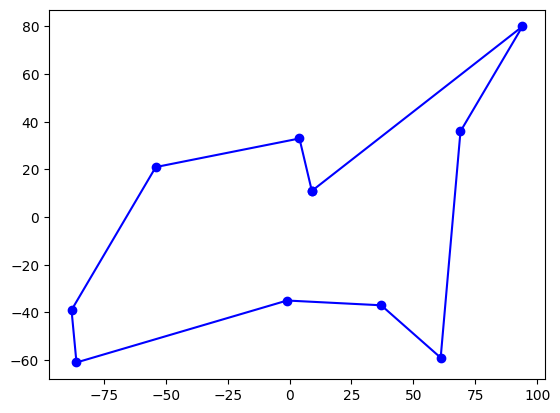

In [41]:
algorytm = Algorythm(adjacency_matrix, START_CITY)
start = time.time()
path = algorytm.A_star_admissable()
end = time.time()
print(f"A* admissable Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Algorytm A* heurystyka niedopuszczalna

A* inadmissable Time = 0.00267791748046875
min distance is 641.5945960003684 for path
[0, 1, 3, 7, 9, 8, 6, 5, 2, 4, 0]


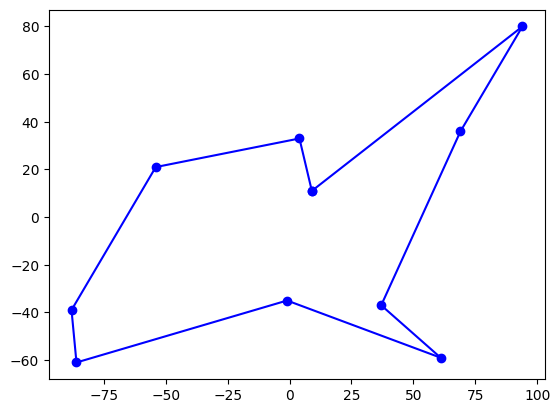

In [42]:
algorytm = Algorythm(adjacency_matrix, START_CITY)
start = time.time()
path = algorytm.A_star_inadmissable()
end = time.time()
print(f"A* inadmissable Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Algorytm BFS/DFS

DFS Time = 0.30228185653686523
min distance is 638.3419377922421 for path
[0, 1, 3, 7, 9, 8, 5, 6, 2, 4, 0]


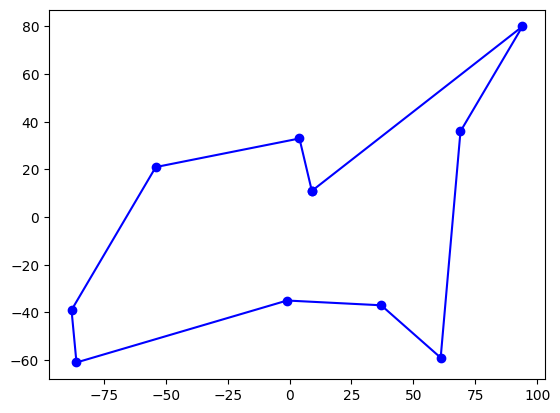

In [43]:
branch_algorytm = Algorythm(adjacency_matrix, START_CITY)
start = time.time()
all_paths = branch_algorytm.tsp_dfs()
end = time.time()
print(f"DFS Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Algorytm NN V2

NN Time = 0.0008249282836914062
min distance is 638.3419377922421 for path
[0, 1, 3, 7, 9, 8, 5, 6, 2, 4, 0]


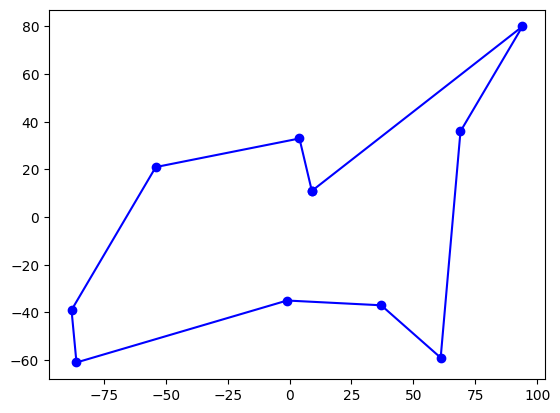

In [44]:
try:
    algorytm_NN = AlgorythmNN(start=0, adjacency_matrix=adjacency_matrix)
    start = time.time()
    path = algorytm_NN.NN_algorytm_V2()
    end = time.time()
    print(f"NN Time = {end - start}")
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print("No way")